# ch12 데이터프레임과 시리즈

## pandas package

- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터 프레임 제공
- 결측치 처리, 크기 변경(삽입, 삭제, 슬라이싱), 데이터 분할, 병합, 구조 변경, 데이터 정렬, 파일 입출력

In [2]:
import pandas as pd
data = pd.read_json('data/member2.json', encoding='utf-8')
data

,name,age,email,address
0,hong,34,wwww,seoul
1,jung,44,werw,seoul
2,kim,64,wutw,seoul


In [3]:
type(data)

pandas.core.frame.DataFrame

## 데이터프레임 만들기

### 딕셔너리를 이용해서 데이터프레임 만들기

In [4]:
d = {'col1':[1,2], 'col2':[3,4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [6]:
d = [{'col1':1, 'col2':3}, {'col1':2, 'col2':4}]
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


### 리스트를 이용해서 데이터프레임 만들기

In [7]:
kor = [100,35,48,98,15]
math = [78,48,66,44,77]
df = pd.DataFrame({'kor':kor, 'math':math})
df

,kor,math
0,100,78
1,35,48
2,48,66
3,98,44
4,15,77


In [10]:
import numpy as np
df = pd.DataFrame(np.c_[kor, math], columns=['kor', 'math'])
df

,kor,math
0,100,78
1,35,48
2,48,66
3,98,44
4,15,77


In [11]:
np.c_[[kor],[math]]

array([[100,  35,  48,  98,  15,  78,  48,  66,  44,  77]])

In [12]:
pd.DataFrame(np.c_[[kor],[math]], columns=['score1', 'score2', 'score3','score4','score5','score6','score7','score8','score9','score10'])

,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,100,35,48,98,15,78,48,66,44,77


### read_csv

In [14]:
df = pd.read_csv('data/data/상가업소정보_201912_01.csv', sep='|', encoding='utf-8')

In [15]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


In [18]:
pd.options.display.max_columns = 40#최대 출력 컬럼 수
df.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675


In [113]:
# csv 파일로 읽어오기
member_df = pd.read_csv('data/ch12_member_data.csv', sep=',', encoding = 'utf-8', comment='#')
member_df

,Name,Age,Email,Address
0,hong,20,kil@naver.com,seoul
1,lee,43,jung@naver.com,seoul
2,han,22,ji@naver.com,seoul
3,kim,33,chul@naver.com,seoul


In [22]:
type(member_df)

pandas.core.frame.DataFrame

In [23]:
type(member_df['Name'])

pandas.core.series.Series

In [24]:
# 행 제외하기

In [112]:
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#', skiprows=[0,3])# , utf-9이 기본값
member_df

,hong,20,kil@naver.com,seoul
0,lee,43,jung@naver.com,seoul
1,kim,33,chul@naver.com,seoul


### sklearn.datasets 모듈 데이터로 데이터 프레임 만들기
- sklearn 패키지에는 학습을 위한 많은 데이터셋 제공

In [26]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [27]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [29]:
iris["feature_names"] #독립변수 컬럼명
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
iris["data"]#독립변수
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [33]:
iris['target'] #원핫인코딩이 된 종속 변수
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
iris["target_names"]
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
#사람이 알아보기 쉬운 원핫인코딩 되지 않은 종속변수
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [37]:
x = pd.DataFrame(iris.data, columns=iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
#x.columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
x.columns = [col[0:12].strip().replace(' ','_') for col in x.columns] #컬럼명 수정
x #독립변수

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [48]:
iris = pd.concat([x,y], axis=1) #열병합
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
iris.shape

(150, 5)

## 이름 지정하기(열,행)

### 열 이름 지정

In [53]:
member_df

,Name,Age,Email,Address
0,hong,20,kil@naver.com,seoul
1,lee,43,jung@naver.com,seoul
2,han,22,ji@naver.com,seoul
3,kim,33,chul@naver.com,seoul


In [54]:
member_df.columns = ['name', 'age', 'email', 'address']
member_df

,name,age,email,address
0,hong,20,kil@naver.com,seoul
1,lee,43,jung@naver.com,seoul
2,han,22,ji@naver.com,seoul
3,kim,33,chul@naver.com,seoul


### 행 이름 지정

In [56]:
member_df.index = ['1st', '2nd', '3rd', '4th']
member_df

,name,age,email,address
1st,hong,20,kil@naver.com,seoul
2nd,lee,43,jung@naver.com,seoul
3rd,han,22,ji@naver.com,seoul
4th,kim,33,chul@naver.com,seoul


In [59]:
member_df.loc['1st', 'name']

'hong'

### 레벨 이름 지정

In [60]:
member_df.colums = [['기본정보', '기본정보', '추가정보', '추가정보'],
                   ['name', 'age', 'email', 'address']]

<ipython-input-60-6bfcde8c37db>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  member_df.colums = [['기본정보', '기본정보', '추가정보', '추가정보'],


In [ ]:
member_df.index = [ ['1st', '2nd', '3rd', '4th']]

## 부분 데이터 조회

In [61]:
member_df = pd.read_csv('data/ch12_member_data.csv')
member_df

,Name,Age,Email,Address
0,hong,20,kil@naver.com,seoul
1,lee,43,jung@naver.com,seoul
2,han,22,ji@naver.com,seoul
3,kim,33,chul@naver.com,seoul


### 단일열 조회

In [63]:
member_df.Name

0    hong
1     lee
2     han
3     kim
Name: Name, dtype: object

In [64]:
member_df['Name']

0    hong
1     lee
2     han
3     kim
Name: Name, dtype: object

In [67]:
#데이터 프레임을 읽고
member_df.shape

(4, 4)

In [68]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     4 non-null      object
 1   Age      4 non-null      int64 
 2   Email    4 non-null      object
 3   Address  4 non-null      object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes


In [69]:
pd.to_numeric(member_df['Age'], errors='coerce') #문자인 나이 필드를 숫자로 바꾸고 에러 무시

0    20
1    43
2    22
3    33
Name: Age, dtype: int64

In [70]:
member_df.isnull() #결측치 확인

,Name,Age,Email,Address
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [71]:
member_df.isna() #결측치 확인

,Name,Age,Email,Address
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [72]:
type(member_df["Name"]) # 단일열 시리즈

pandas.core.series.Series

In [73]:
member_df["Name"]

0    hong
1     lee
2     han
3     kim
Name: Name, dtype: object

### loc을 이용한  조회(column, index)

In [74]:
member_df.index = ['1st', '2nd', '3rd', '4th']
member_df

,Name,Age,Email,Address
1st,hong,20,kil@naver.com,seoul
2nd,lee,43,jung@naver.com,seoul
3rd,han,22,ji@naver.com,seoul
4th,kim,33,chul@naver.com,seoul


In [77]:
member_df.loc['2nd':'4th', 'Name':'Email'] #2nd ~ 4th 행의 이름부터 이메일

,Name,Age,Email
2nd,lee,43,jung@naver.com
3rd,han,22,ji@naver.com
4th,kim,33,chul@naver.com


In [78]:
member_df.loc[member_df.Age>30]

,Name,Age,Email,Address
2nd,lee,43,jung@naver.com,seoul
4th,kim,33,chul@naver.com,seoul


### iloc을 이용한 조회 (정수로 조회)

In [80]:
member_df.iloc[1, 1:3]

Age                  43
Email    jung@naver.com
Name: 2nd, dtype: object

In [81]:
member_df.iloc[2] #열 인덱스 생략시 전체 열

Name                han
Age                  22
Email      ji@naver.com
Address           seoul
Name: 3rd, dtype: object

In [82]:
member_df.iloc[::-1, ::-1]#열과 행 거꾸로

,Address,Email,Age,Name
4th,seoul,chul@naver.com,33,kim
3rd,seoul,ji@naver.com,22,han
2nd,seoul,jung@naver.com,43,lee
1st,seoul,kil@naver.com,20,hong


In [83]:
member_df.iloc[[0,3], [0,1,3]]

,Name,Age,Address
1st,hong,20,seoul
4th,kim,33,seoul


### 조건으로 조회하기

In [85]:
from sklearn import datasets
iris = datasets.load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
iris_df = pd.concat([x,y], axis=1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [86]:
import seaborn as sns
iris_df = sns.load_dataset("iris")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [87]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets")
iris_df = iris.data
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [89]:
iris_df.iloc[0:5, :-1]#독립변수 5행

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [96]:
iris_df.loc[iris_df.Species=='virginica', ['Sepal.Length', 'Sepal.Width']].head() # .이 없으면 [""] 필요 없음

,Sepal.Length,Sepal.Width
100,6.3,3.3
101,5.8,2.7
102,7.1,3.0
103,6.3,2.9
104,6.5,3.0


In [101]:
iris_df.loc[(iris_df.Species=='virginica') & (iris_df['Sepal.Length'] >= 6.5)].head() # 조건 두개 이상시 ()작성

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
102,7.1,3.0,5.9,2.1,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica


## 데이터 추가 및 삭제

### 데이터 프레임 요소 삭제

In [115]:
member_df = pd.read_csv('data/ch12_member_data.csv', sep=',', encoding = 'utf-8', comment='#')
member_df

,Name,Age,Email,Address
0,hong,20,kil@naver.com,seoul
1,lee,43,jung@naver.com,seoul
2,han,22,ji@naver.com,seoul
3,kim,33,chul@naver.com,seoul


In [116]:
# 단일 행 삭제하기
member_df = member_df.drop(3)#axis=0 생략, 초기화 필요
member_df

,Name,Age,Email,Address
0,hong,20,kil@naver.com,seoul
1,lee,43,jung@naver.com,seoul
2,han,22,ji@naver.com,seoul


In [117]:
member_df.drop('Email', axis=1, inplace=True)# inplace 속성 설정(True, False)
member_df

,Name,Age,Address
0,hong,20,seoul
1,lee,43,seoul
2,han,22,seoul


### 데이터프레임 요소 추가

In [119]:
# 열 추가
member_df = pd.read_csv('data/ch12_member_data.csv')
member_df

,Name,Age,Email,Address
0,hong,20,kil@naver.com,seoul
1,lee,43,jung@naver.com,seoul
2,han,22,ji@naver.com,seoul
3,kim,33,chul@naver.com,seoul


In [120]:
member_df['Birthyear'] = 2021 - member_df['Age'] +1
member_df

,Name,Age,Email,Address,Birthyear
0,hong,20,kil@naver.com,seoul,2002
1,lee,43,jung@naver.com,seoul,1979
2,han,22,ji@naver.com,seoul,2000
3,kim,33,chul@naver.com,seoul,1989


In [121]:
import numpy as np
np.nan

nan

In [123]:
type(np.nan)

float

In [124]:
type(pd.np.nan)

<ipython-input-124-e71c757bba12>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  type(pd.np.nan)


float

In [134]:
#시리즈 열 추가
member_df['Birthyear'] = pd.Series([2001,1995,1996],index=[0,2,3])
member_df

,Name,Age,Email,Address,Birthyear
0,hong,20,kil@naver.com,seoul,2001.0
1,lee,43,jung@naver.com,seoul,NaN
2,han,22,ji@naver.com,seoul,1995.0
3,kim,33,chul@naver.com,seoul,1996.0
4,kang,43,goon@naver.com,seoul,NaN


In [125]:
# 행 추가
member_df = pd.read_csv('data/ch12_member_data.csv')
member_df

,Name,Age,Email,Address
0,hong,20,kil@naver.com,seoul
1,lee,43,jung@naver.com,seoul
2,han,22,ji@naver.com,seoul
3,kim,33,chul@naver.com,seoul


In [126]:
new_member = pd.Series(['kang', 43, 'goon@naver.com', 'seoul'],
                      index = member_df.columns)

In [131]:
member_df = member_df.append(new_member, ignore_index=True)
member_df

,Name,Age,Email,Address
0,hong,20,kil@naver.com,seoul
1,lee,43,jung@naver.com,seoul
2,han,22,ji@naver.com,seoul
3,kim,33,chul@naver.com,seoul
4,kang,43,goon@naver.com,seoul


In [136]:
# 딕셔너리 행 추가
new_member = {'Name':'jin', 'Age':33, 'Email':'lan@naver.com', 'Address':'seoul', 'Birthyear':1998}
member_df.append(new_member, ignore_index=True)

,Name,Age,Email,Address,Birthyear
0,hong,20,kil@naver.com,seoul,2001.0
1,lee,43,jung@naver.com,seoul,NaN
2,han,22,ji@naver.com,seoul,1995.0
3,kim,33,chul@naver.com,seoul,1996.0
4,kang,43,goon@naver.com,seoul,NaN
5,jin,33,lan@naver.com,seoul,1998.0


In [142]:
#데이터 프레임 행 추가(여러행 한번에 추가)
new_member = pd.DataFrame({'Name':['oh', 'choi'], 'Age':[44,54], 'Email':['wer@naver.com','sdf@naver.com'],
                          'Address':['seoul', 'seoul'], 'Birthyear':[1997,2008]})
member_df = member_df.append(new_member, ignore_index=True)

## 정렬

### 행 이름으로 정렬

In [145]:
member_df.sort_index(inplace=True, axis=0)
member_df

,Name,Age,Email,Address,Birthyear
0,hong,20,kil@naver.com,seoul,2001.0
1,lee,43,jung@naver.com,seoul,NaN
2,han,22,ji@naver.com,seoul,1995.0
3,kim,33,chul@naver.com,seoul,1996.0
4,kang,43,goon@naver.com,seoul,NaN
5,oh,44,wer@naver.com,seoul,1997.0
6,choi,54,sdf@naver.com,seoul,2008.0


### 열 이름으로 정렬

In [147]:
member_df.sort_index(axis=1)

,Address,Age,Birthyear,Email,Name
0,seoul,20,2001.0,kil@naver.com,hong
1,seoul,43,NaN,jung@naver.com,lee
2,seoul,22,1995.0,ji@naver.com,han
3,seoul,33,1996.0,chul@naver.com,kim
4,seoul,43,NaN,goon@naver.com,kang
5,seoul,44,1997.0,wer@naver.com,oh
6,seoul,54,2008.0,sdf@naver.com,choi


### 값으로 정렬

In [149]:
member_df.sort_values(by=["Name"], inplace=True)
member_df

,Name,Age,Email,Address,Birthyear
6,choi,54,sdf@naver.com,seoul,2008.0
2,han,22,ji@naver.com,seoul,1995.0
0,hong,20,kil@naver.com,seoul,2001.0
4,kang,43,goon@naver.com,seoul,NaN
3,kim,33,chul@naver.com,seoul,1996.0
1,lee,43,jung@naver.com,seoul,NaN
5,oh,44,wer@naver.com,seoul,1997.0


In [151]:
new_series = pd.Series(['lee', 23, 'soo@naver.com', 'seoul', 1999], index = member_df.columns)
new_series

Name                   lee
Age                     23
Email        soo@naver.com
Address              seoul
Birthyear             1999
dtype: object

In [153]:
member_df = member_df.append(new_series, ignore_index=True)
member_df

,Name,Age,Email,Address,Birthyear
0,choi,54,sdf@naver.com,seoul,2008.0
1,han,22,ji@naver.com,seoul,1995.0
2,hong,20,kil@naver.com,seoul,2001.0
3,kang,43,goon@naver.com,seoul,NaN
4,kim,33,chul@naver.com,seoul,1996.0
5,lee,43,jung@naver.com,seoul,NaN
6,oh,44,wer@naver.com,seoul,1997.0
7,lee,23,soo@naver.com,seoul,1999.0


In [155]:
member_df.sort_values(by=["Name", "Age"], inplace=True)
member_df

,Name,Age,Email,Address,Birthyear
0,choi,54,sdf@naver.com,seoul,2008.0
1,han,22,ji@naver.com,seoul,1995.0
2,hong,20,kil@naver.com,seoul,2001.0
3,kang,43,goon@naver.com,seoul,NaN
4,kim,33,chul@naver.com,seoul,1996.0
7,lee,23,soo@naver.com,seoul,1999.0
5,lee,43,jung@naver.com,seoul,NaN
6,oh,44,wer@naver.com,seoul,1997.0


## 기초 통계 분석
- count: 결측치를 제외한 갯수
- min:최소, max:최대, sum:합, cumprod:누적합, mean:평균, median:중앙값
- quantile:분위수, corr:상관관계, var: 분산(std**2)

In [157]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets")
iris_df = iris.data
iris_df.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [158]:
iris_df.shape

(150, 5)

### 최소, 최대, 평균, 중위

In [161]:
iris_df.min()# 열별

Sepal.Length       4.3
Sepal.Width          2
Petal.Length         1
Petal.Width        0.1
Species         setosa
dtype: object

In [162]:
iris_df.min(axis=1) #행별

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [163]:
iris_df.max()

Sepal.Length          7.9
Sepal.Width           4.4
Petal.Length          6.9
Petal.Width           2.5
Species         virginica
dtype: object

In [164]:
iris_df.median()

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [165]:
iris_df.var()# 열별 분산

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [168]:
iris_df.quantile(q=[0.0,0.25,0.5,0.75,1.0]) # 사분위수

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


### 요약 통계량

In [169]:
iris_df.describe() #기본적으로 숫자 데이터만 요약 통계 출력

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [171]:
iris_df.iloc[:, -1].describe() # 문자 또는 타임스탬프 자료의 요약 통계
#unique: 자료의 가지수, top: 제일 많이 나오는 자료, freq: 몇번 나오는지

count           150
unique            3
top       virginica
freq             50
Name: Species, dtype: object

In [ ]:
#include, exclude 사용 예
df = pd.DataFrame({'a' : [1,2]*3,
                   'b' : [True, False]*3,
                   'c' : [2.0, 4]*3})
df

In [ ]:
df.describe() # 요약통계량 출력시 bool 타입은 제외

In [ ]:
df.info()

In [ ]:
# include 및 exclude 매개변수를 사용하여 분석되는 열을 추가하거나 제외시킬 수 있다.
df.describe(include=['int64','bool'])

In [ ]:
df.describe(include=['int64'])

In [ ]:
df.describe(exclude=['bool','float64']) # exclude 분석열에서 제외할 타입

In [ ]:
# include와 exclude에 같은 유형이 사용되면 오류 발생
df.describe(include=['int64'], exclude=['int64','float64'])

In [ ]:
var = iris_df.var()
var

In [ ]:
import numpy as np
np.sqrt(var)

In [ ]:
iris_df.std()

### 공분산, 상관계수

In [173]:
#공분산 cov(x,y) > E((x-x의 평균)(y-y의 평균)) 
# 분산 var(x) > E((x-x의 평균)의 제곱)

In [174]:
iris_df.cov()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.685694,-0.042434,1.274315,0.516271
Sepal.Width,-0.042434,0.189979,-0.329656,-0.121639
Petal.Length,1.274315,-0.329656,3.116278,1.295609
Petal.Width,0.516271,-0.121639,1.295609,0.581006


In [175]:
#상관계수 -1 <= r <= 1
iris_df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

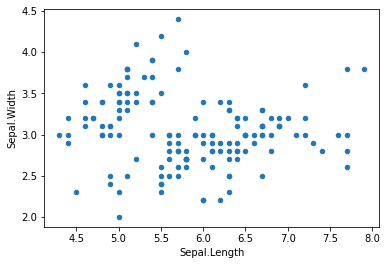

In [177]:
iris_df.plot(x='Sepal.Length', y='Sepal.Width',kind='scatter')

<AxesSubplot:xlabel='Petal.Length', ylabel='Petal.Width'>

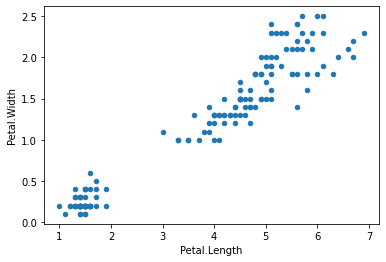

In [178]:
iris_df.plot(x='Petal.Length', y='Petal.Width',kind='scatter')